In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.model.instance_hardness import *
from src.utils import *
from src.visualization.plots import *
from src.model.dkdn import *

np.random.seed(1234)

n = 100

mu1, mu2, sigma = 0, -2, 1

X1 = np.random.normal(mu1, sigma, size=[n, 2])
X2 = np.random.normal(mu2, sigma, size=[n, 2])
X3 = np.random.normal([-2, 2], 0.5, size=[n, 2])
X = np.vstack((X1, X2, X3))

y = np.hstack((np.zeros(int(len(X1))),np.ones(int(len(X2) + len(X3))))).astype(int)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Conjunto de datos de train

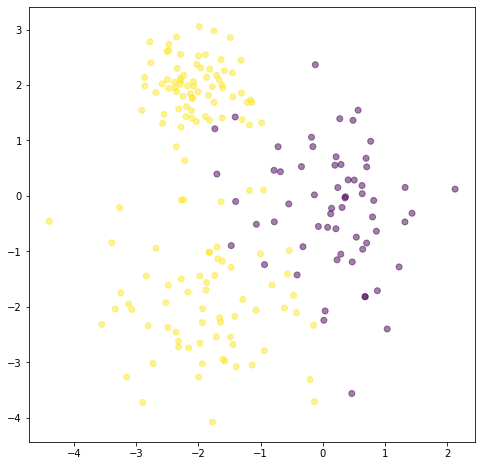

In [105]:
figure, axes = plt.subplots(figsize=[8, 8])

plt.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.5)

plt.show()

### Cálculo de complejidad

#### KDN

In [106]:
complexity, _ = kdn_score(X_train, y_train, 1)

In [107]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.074627
std        0.263444
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

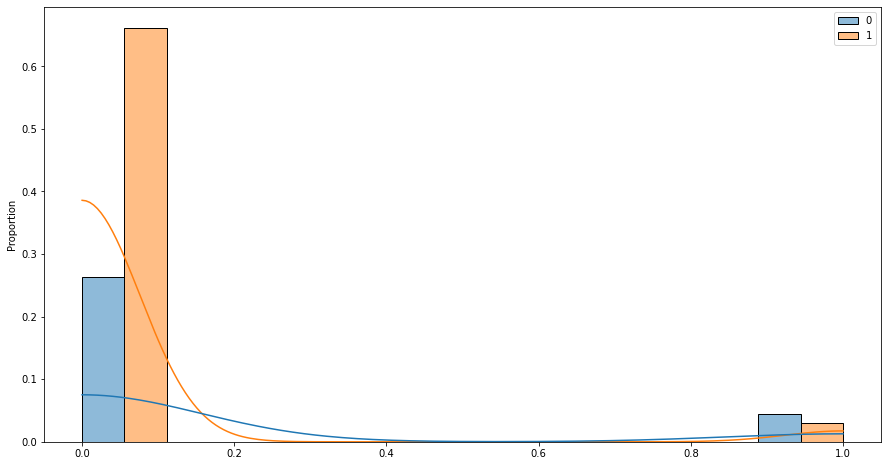

In [108]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [109]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [110]:
global_complexity

0.07462686567164178

In [111]:
class1_complexity

0.04316546762589928

In [112]:
class0_complexity

0.14516129032258066

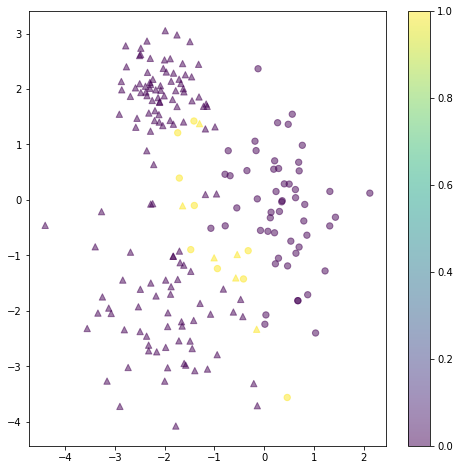

In [113]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [114]:
dynamic_kdn = DkDN(k=1)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [115]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.077114
std        0.265092
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

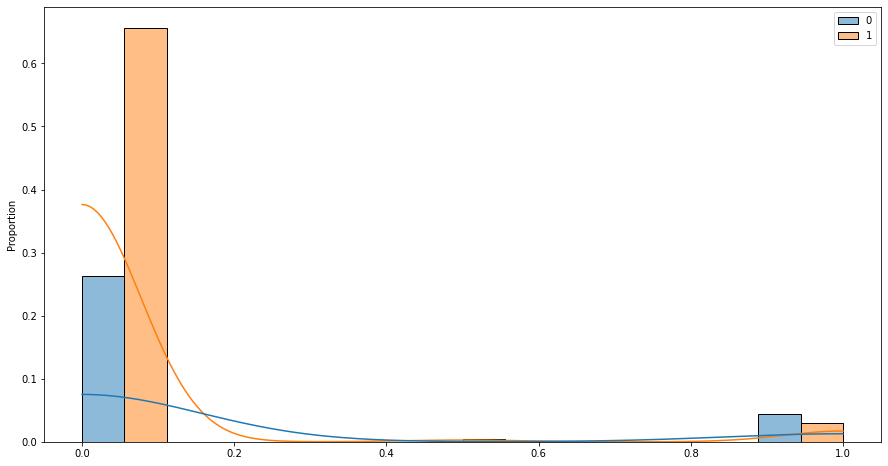

In [116]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [117]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [118]:
global_complexity_d

0.07711442786069651

In [119]:
class1_complexity_d

0.046762589928057555

In [120]:
class0_complexity_d

0.14516129032258066

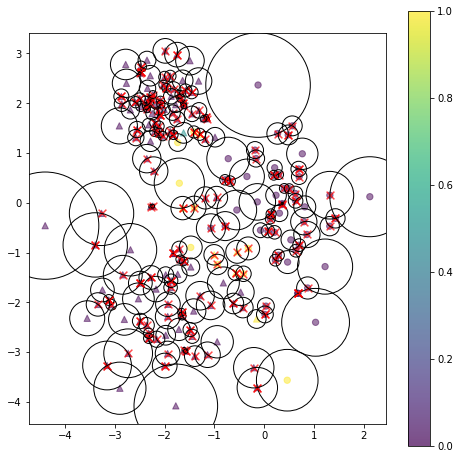

In [121]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [122]:
dynamic_kdn = DkDN(k=1)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [123]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.034378
std        0.117846
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.470000
dtype: float64

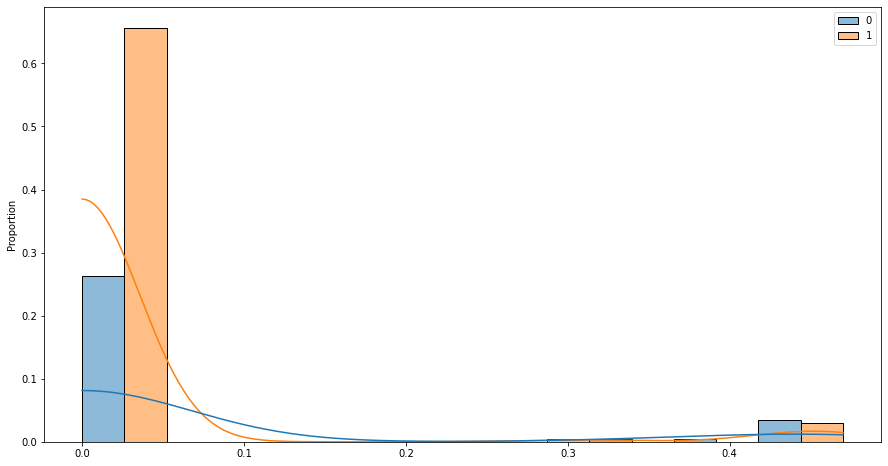

In [124]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [125]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [126]:
global_complexity_d

0.03437810945273632

In [127]:
class1_complexity_d

0.02172661870503597

In [128]:
class0_complexity_d

0.06274193548387096

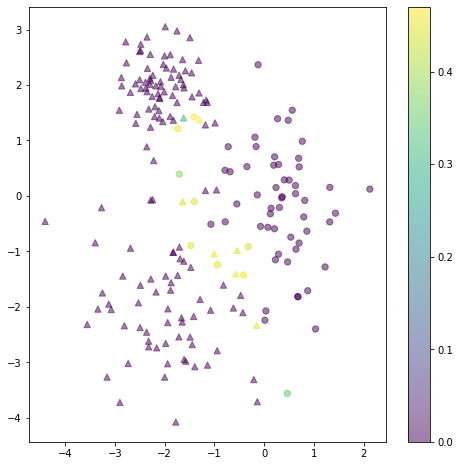

In [129]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [130]:
complexity, _ = kdn_score(X_train, y_train, 2)

In [131]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.087065
std        0.242140
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

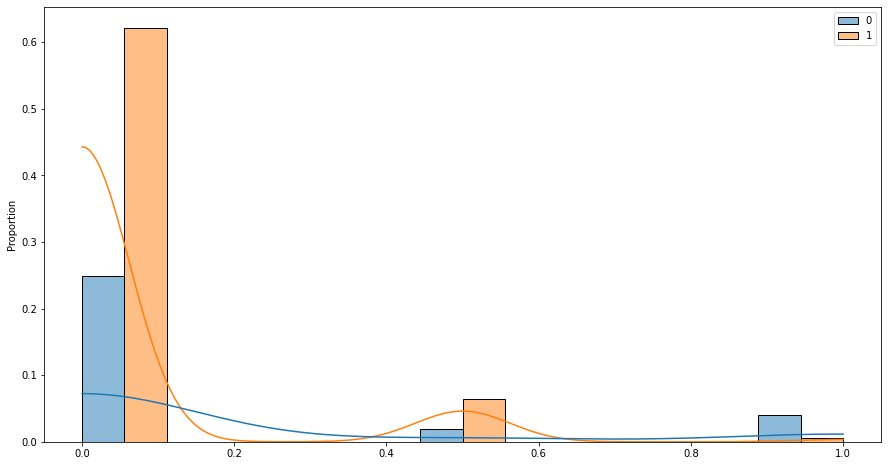

In [132]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [133]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [134]:
global_complexity

0.08706467661691543

In [135]:
class1_complexity

0.0539568345323741

In [136]:
class0_complexity

0.16129032258064516

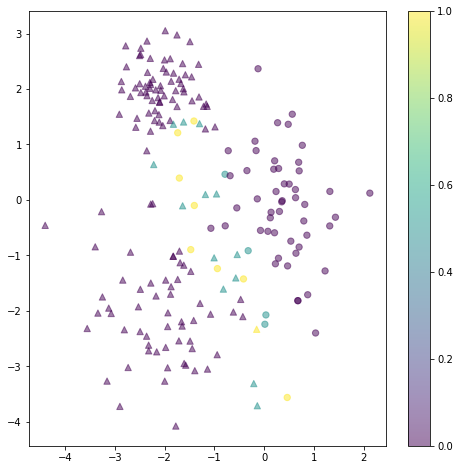

In [137]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [138]:
dynamic_kdn = DkDN(k=2)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [139]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.092587
std        0.234332
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

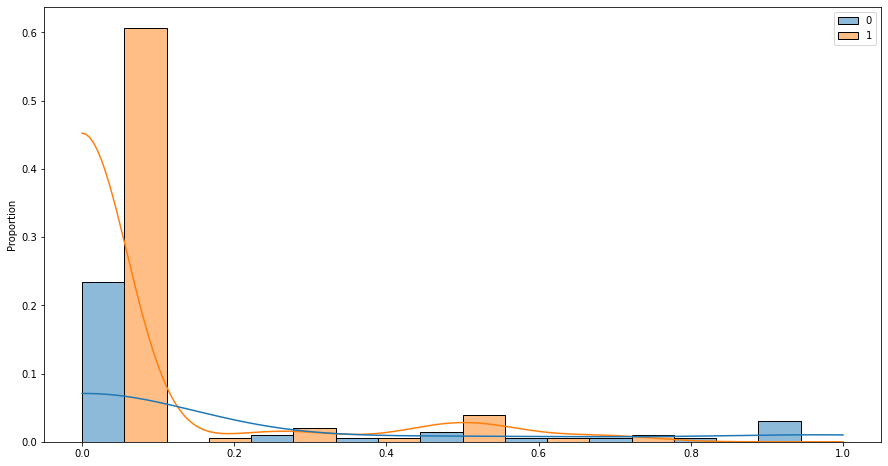

In [140]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [141]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [142]:
global_complexity_d

0.09258706467661691

In [143]:
class1_complexity_d

0.05618705035971223

In [144]:
class0_complexity_d

0.17419354838709677

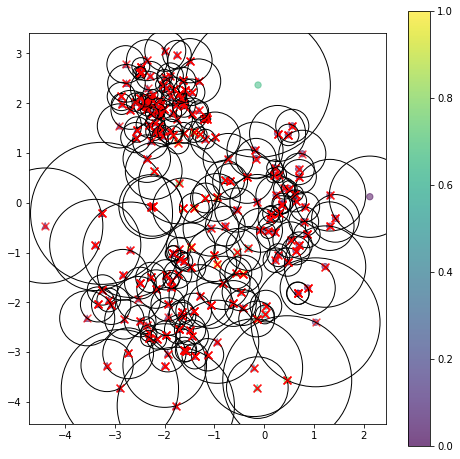

In [145]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [146]:
dynamic_kdn = DkDN(k=2)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [147]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.061692
std        0.156796
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.830000
dtype: float64

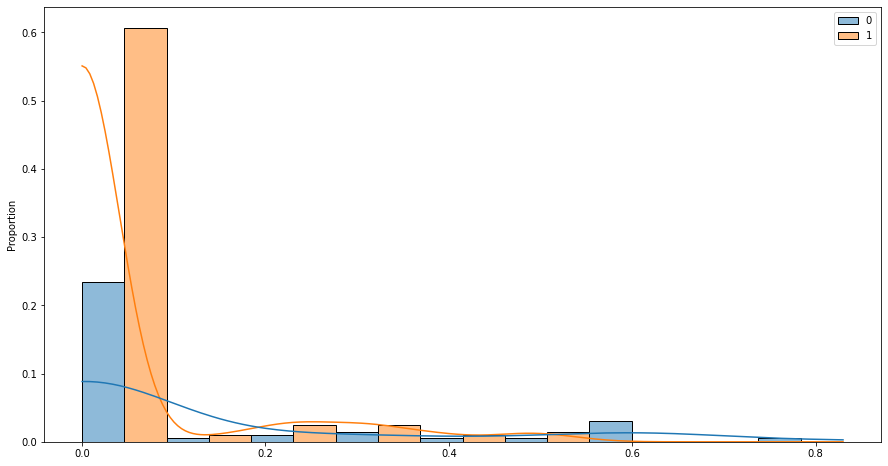

In [148]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [149]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [150]:
global_complexity_d

0.061691542288557215

In [151]:
class1_complexity_d

0.03805755395683453

In [152]:
class0_complexity_d

0.11467741935483872

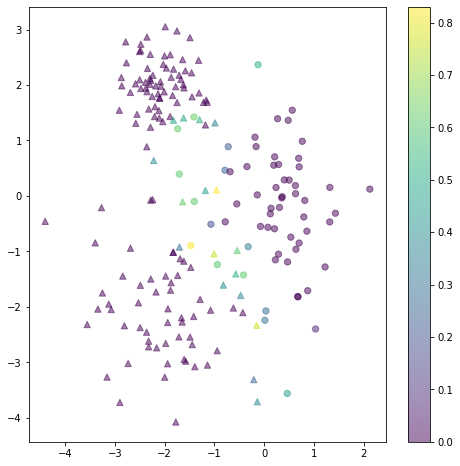

In [153]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [154]:
complexity, _ = kdn_score(X_train, y_train, 3)

In [155]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.091211
std        0.230880
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

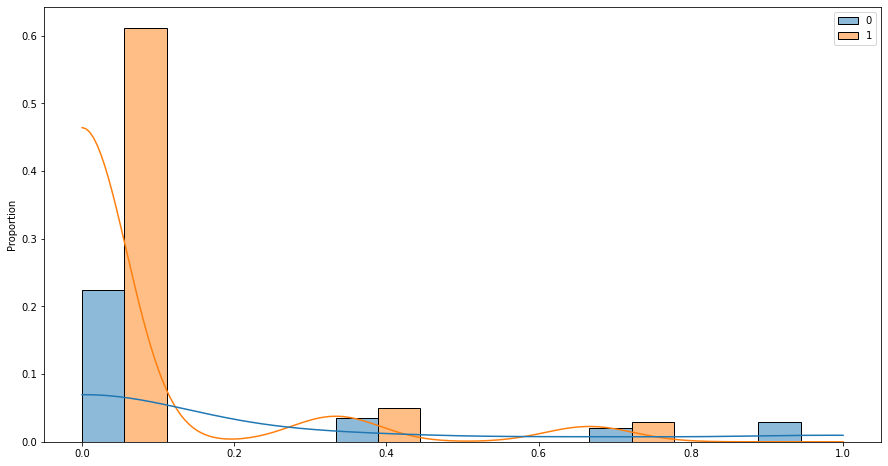

In [156]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [157]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [158]:
global_complexity

0.09121061359867327

In [159]:
class1_complexity

0.052757793764988015

In [160]:
class0_complexity

0.1774193548387097

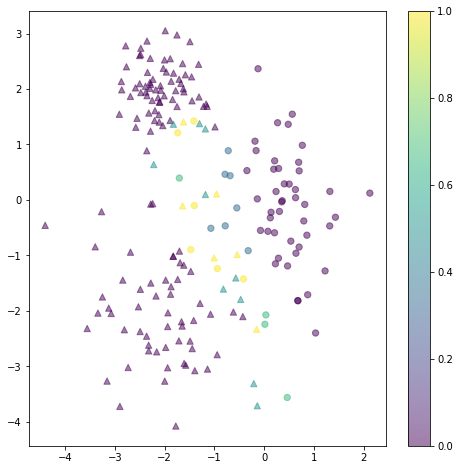

In [161]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [162]:
dynamic_kdn = DkDN(k=3)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [163]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.095721
std        0.223841
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

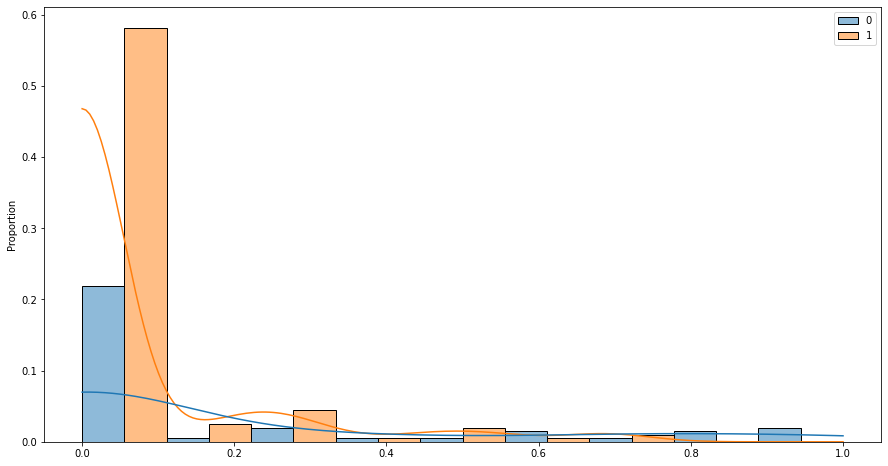

In [164]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [165]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [166]:
global_complexity_d

0.09572139303482587

In [167]:
class1_complexity_d

0.05654676258992806

In [168]:
class0_complexity_d

0.18354838709677418

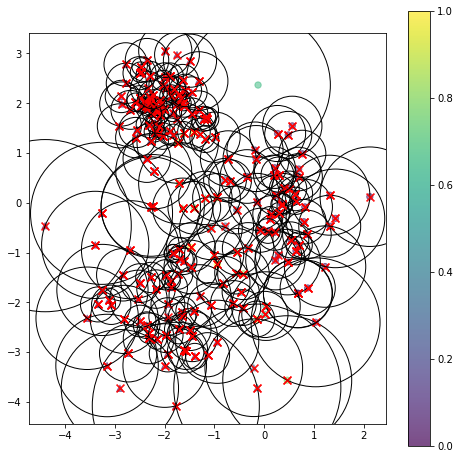

In [169]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [170]:
dynamic_kdn = DkDN(k=3)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [171]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.072338
std        0.171496
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.890000
dtype: float64

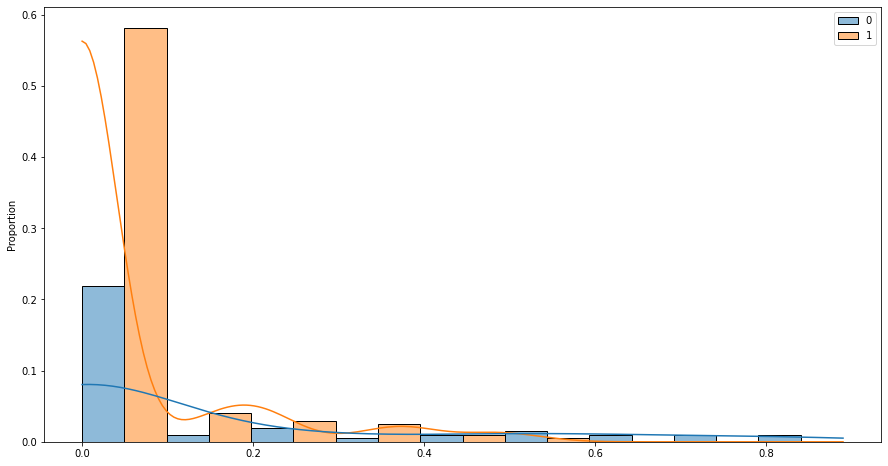

In [172]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [173]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [174]:
global_complexity_d

0.07233830845771144

In [175]:
class1_complexity_d

0.04266187050359712

In [176]:
class0_complexity_d

0.13887096774193544

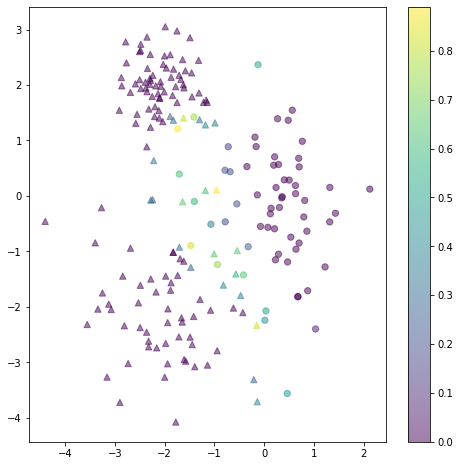

In [177]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [178]:
complexity, _ = kdn_score(X_train, y_train, 4)

In [179]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.093284
std        0.224315
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

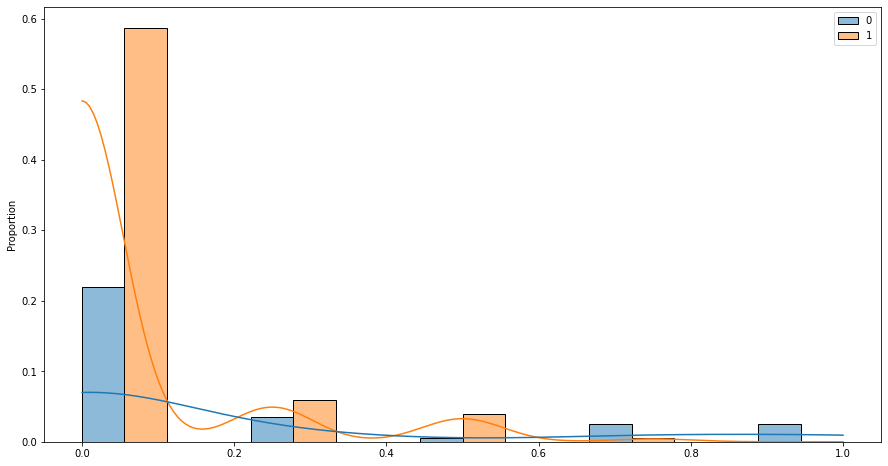

In [180]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [181]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [182]:
global_complexity

0.09328358208955224

In [183]:
class1_complexity

0.05575539568345324

In [184]:
class0_complexity

0.1774193548387097

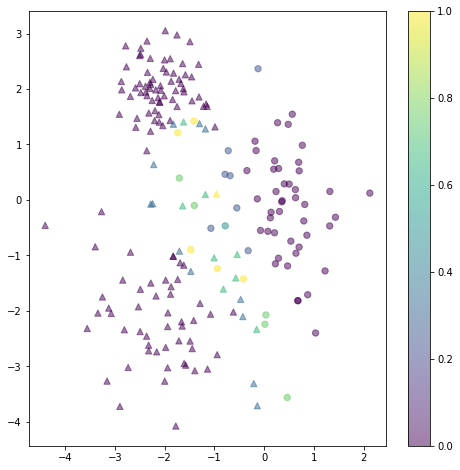

In [185]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [186]:
dynamic_kdn = DkDN(k=4)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [187]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.094975
std        0.212533
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

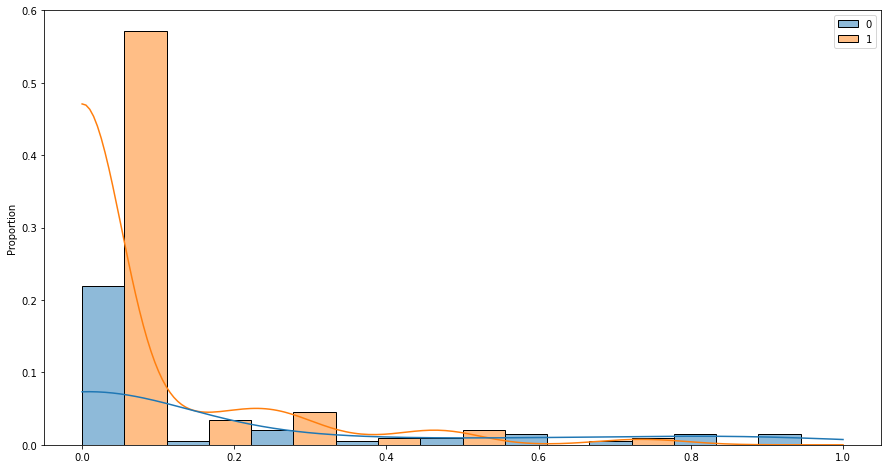

In [188]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [189]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [190]:
global_complexity_d

0.09497512437810945

In [191]:
class1_complexity_d

0.05899280575539568

In [192]:
class0_complexity_d

0.1756451612903226

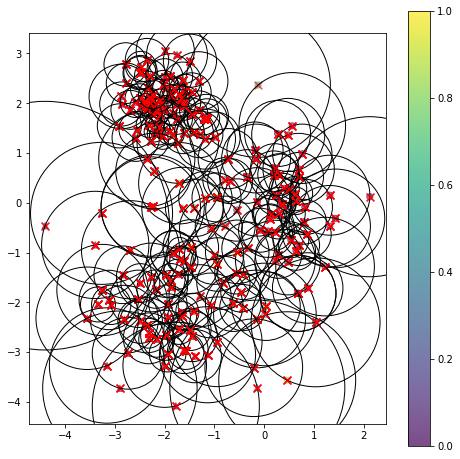

In [193]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [194]:
dynamic_kdn = DkDN(k=4)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [195]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.075920
std        0.170658
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.890000
dtype: float64

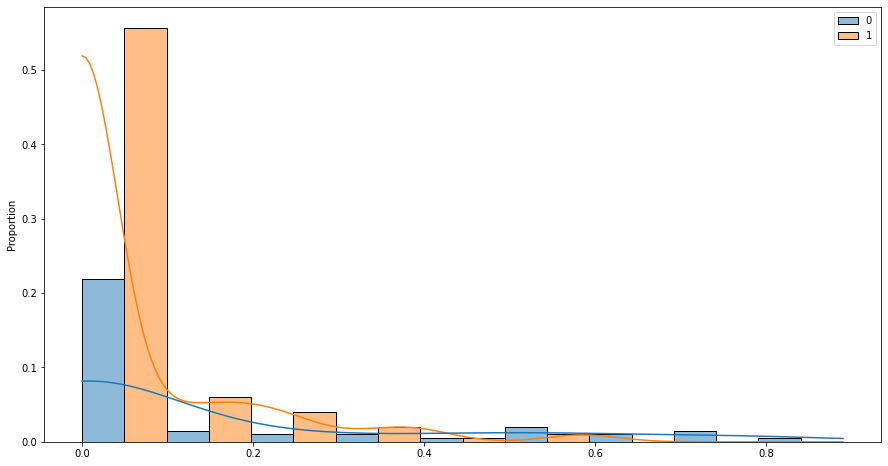

In [196]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [197]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [198]:
global_complexity_d

0.07592039800995025

In [199]:
class1_complexity_d

0.047985611510791365

In [200]:
class0_complexity_d

0.1385483870967742

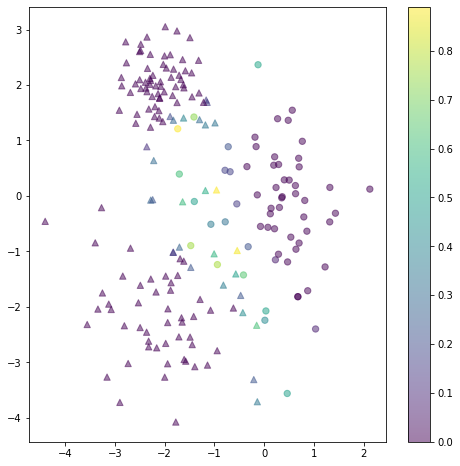

In [201]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [202]:
complexity, _ = kdn_score(X_train, y_train, 5)

In [203]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.096517
std        0.220086
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

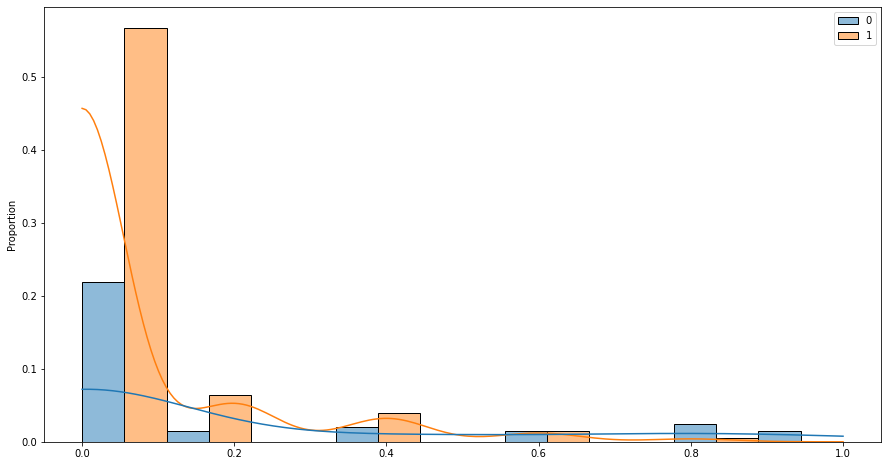

In [204]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [205]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [206]:
global_complexity

0.09651741293532337

In [207]:
class1_complexity

0.060431654676258995

In [208]:
class0_complexity

0.1774193548387097

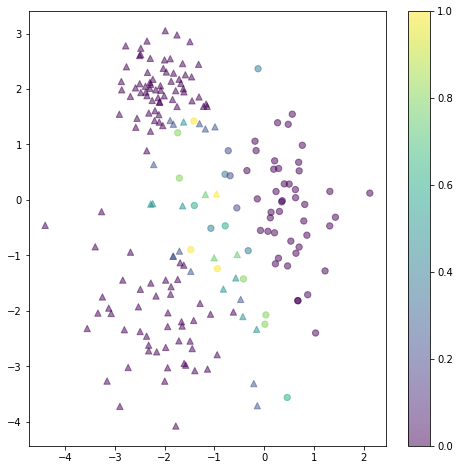

In [209]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [210]:
dynamic_kdn = DkDN(k=5)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [211]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.096119
std        0.208516
min        0.000000
25%        0.000000
50%        0.000000
75%        0.060000
max        1.000000
dtype: float64

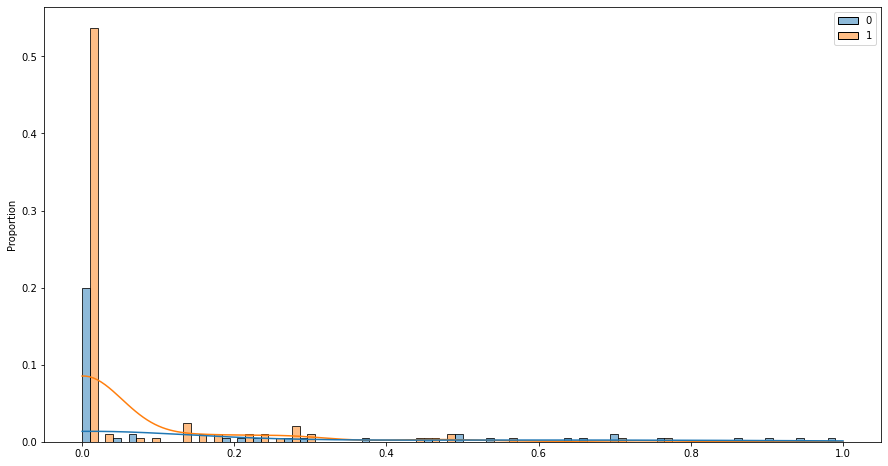

In [212]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [213]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [214]:
global_complexity_d

0.09611940298507463

In [215]:
class1_complexity_d

0.06

In [216]:
class0_complexity_d

0.17709677419354838

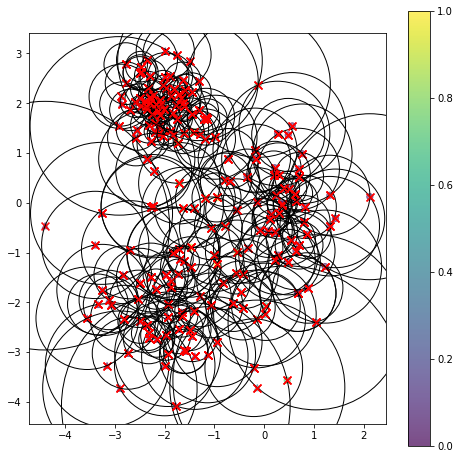

In [217]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [218]:
dynamic_kdn = DkDN(k=5)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [219]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.079104
std        0.171558
min        0.000000
25%        0.000000
50%        0.000000
75%        0.060000
max        0.890000
dtype: float64

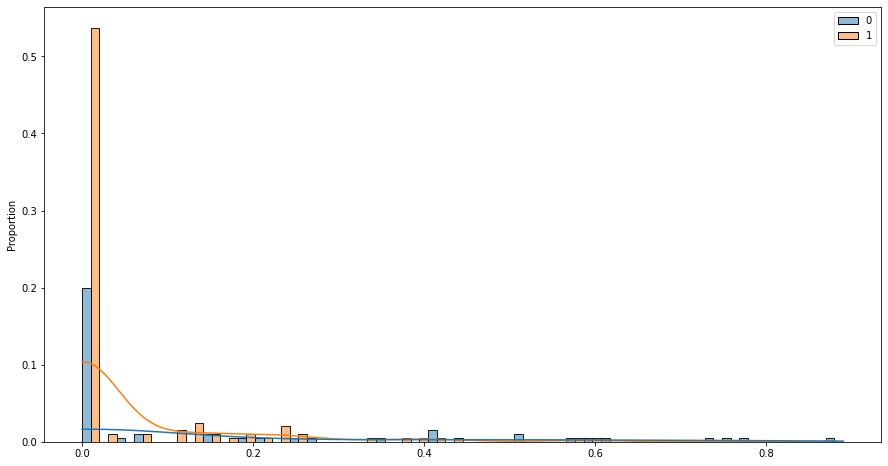

In [220]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [221]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [222]:
global_complexity_d

0.0791044776119403

In [223]:
class1_complexity_d

0.04964028776978417

In [224]:
class0_complexity_d

0.14516129032258066

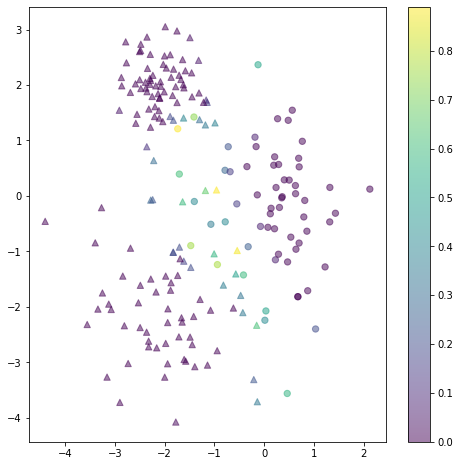

In [225]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [226]:
complexity, _ = kdn_score(X_train, y_train, 6)

In [227]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.094527
std        0.210602
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

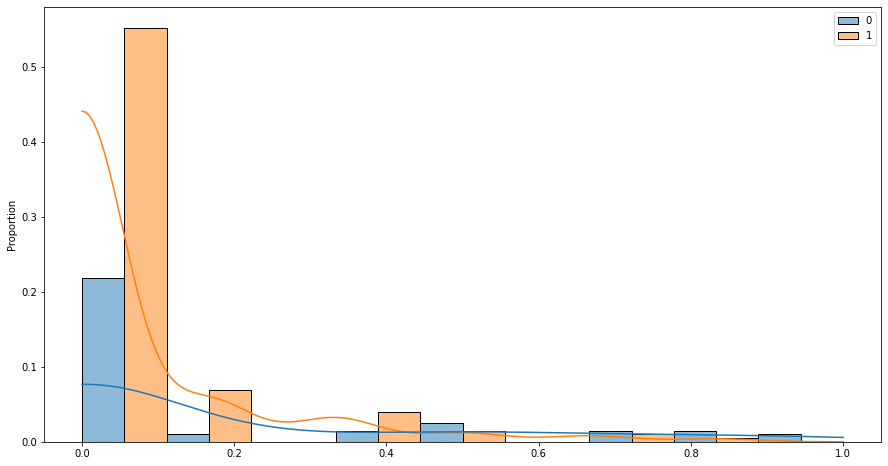

In [228]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [229]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [230]:
global_complexity

0.0945273631840796

In [231]:
class1_complexity

0.06235011990407673

In [232]:
class0_complexity

0.16666666666666666

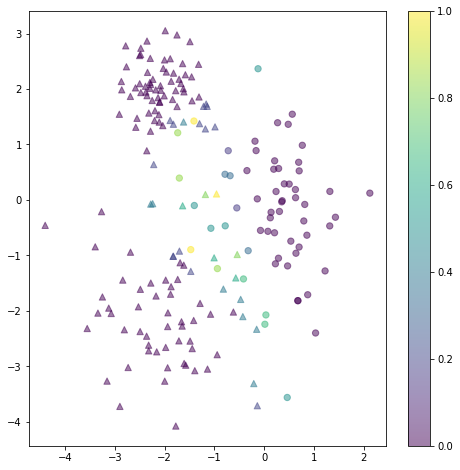

In [233]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [234]:
dynamic_kdn = DkDN(k=6)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [235]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.00000
mean       0.09791
std        0.20410
min        0.00000
25%        0.00000
50%        0.00000
75%        0.08000
max        0.94000
dtype: float64

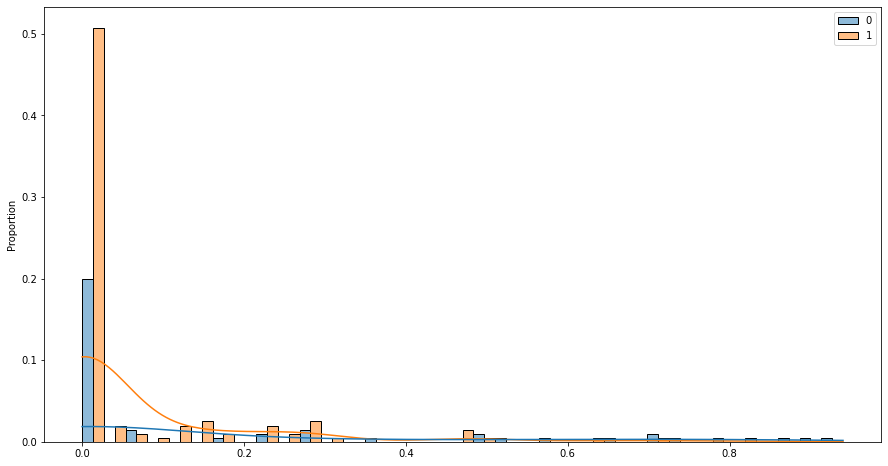

In [236]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [237]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [238]:
global_complexity_d

0.09791044776119402

In [239]:
class1_complexity_d

0.06618705035971223

In [240]:
class0_complexity_d

0.16903225806451613

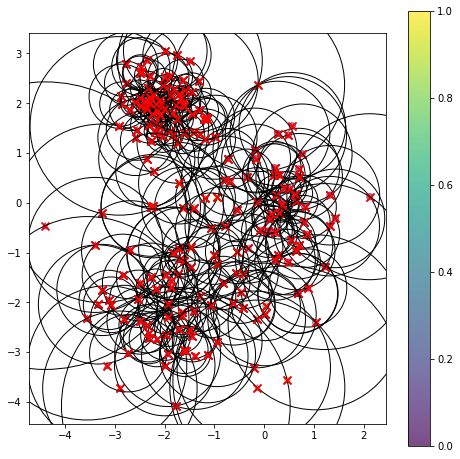

In [241]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [242]:
dynamic_kdn = DkDN(k=6)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [243]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.082488
std        0.171903
min        0.000000
25%        0.000000
50%        0.000000
75%        0.070000
max        0.890000
dtype: float64

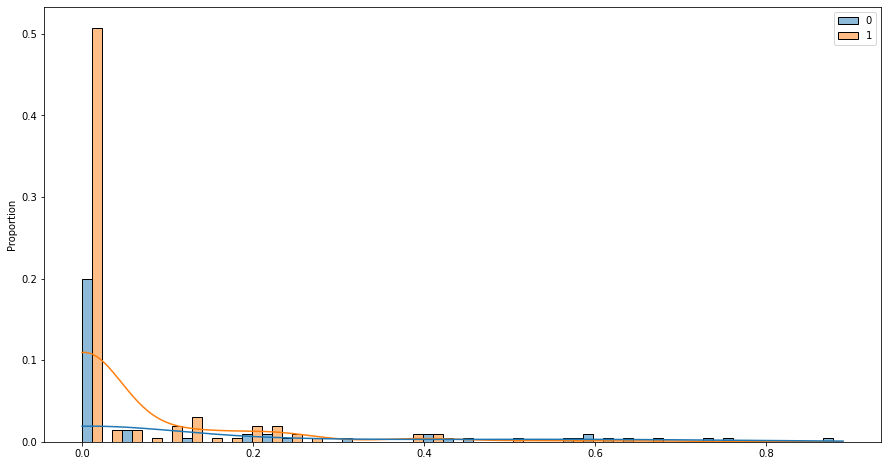

In [244]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [245]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [246]:
global_complexity_d

0.08248756218905472

In [247]:
class1_complexity_d

0.05553956834532373

In [248]:
class0_complexity_d

0.14290322580645165

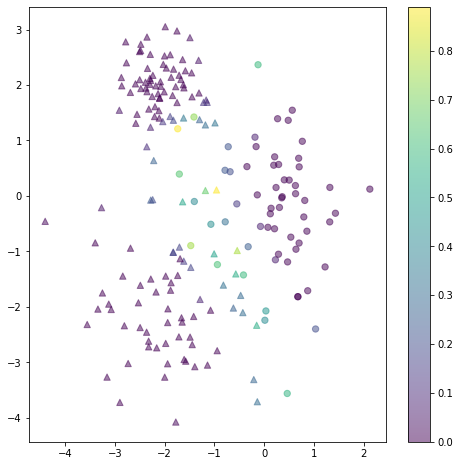

In [249]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [250]:
complexity, _ = kdn_score(X_train, y_train, 7)

In [251]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.094527
std        0.204788
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

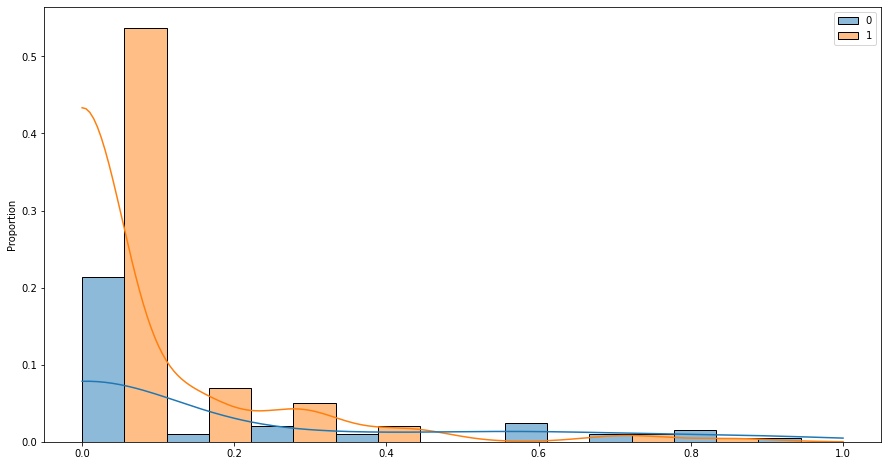

In [252]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [253]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [254]:
global_complexity

0.0945273631840796

In [255]:
class1_complexity

0.06372045220966083

In [256]:
class0_complexity

0.1635944700460829

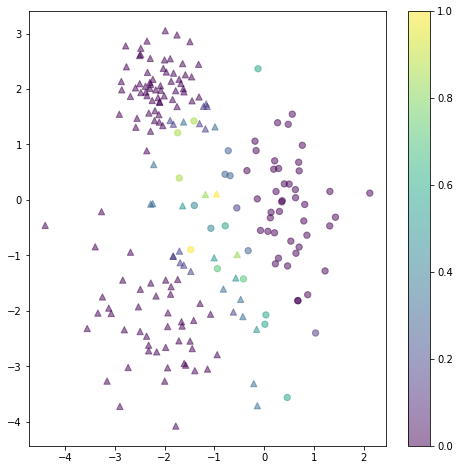

In [257]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [258]:
dynamic_kdn = DkDN(k=7)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [259]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.100050
std        0.203218
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.940000
dtype: float64

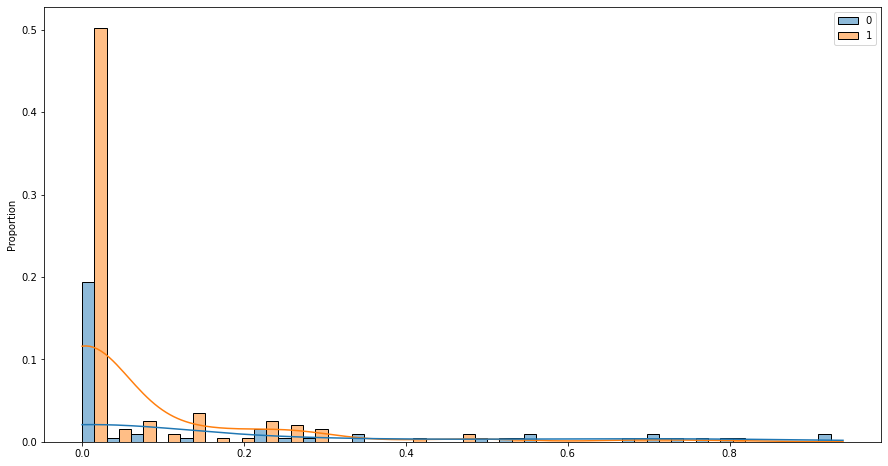

In [260]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [261]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [262]:
global_complexity_d

0.10004975124378108

In [263]:
class1_complexity_d

0.06755395683453237

In [264]:
class0_complexity_d

0.1729032258064516

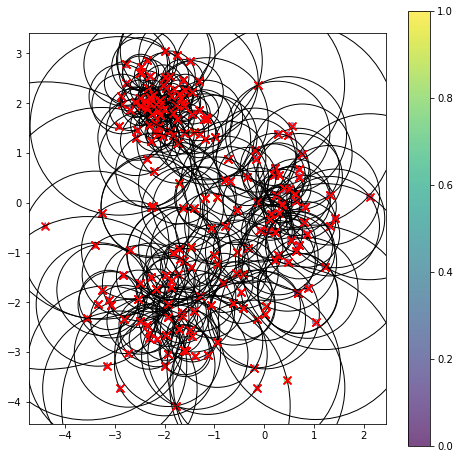

In [265]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [266]:
dynamic_kdn = DkDN(k=7)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [267]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.085572
std        0.173948
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.890000
dtype: float64

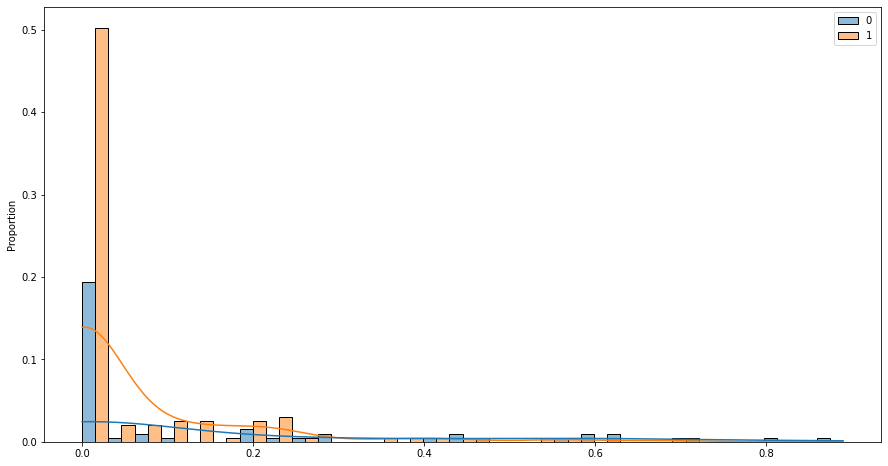

In [268]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [269]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [270]:
global_complexity_d

0.0855721393034826

In [271]:
class1_complexity_d

0.057625899280575536

In [272]:
class0_complexity_d

0.14822580645161293

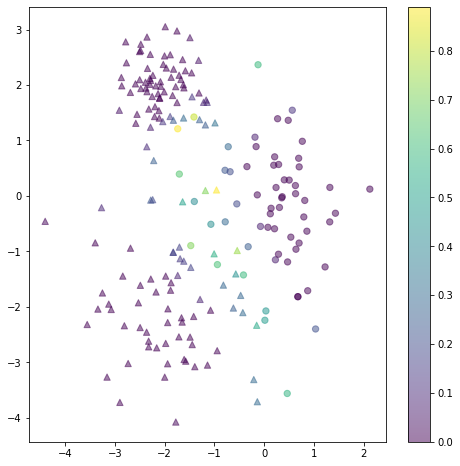

In [273]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [274]:
complexity, _ = kdn_score(X_train, y_train, 8)

In [275]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.093284
std        0.198836
min        0.000000
25%        0.000000
50%        0.000000
75%        0.125000
max        0.875000
dtype: float64

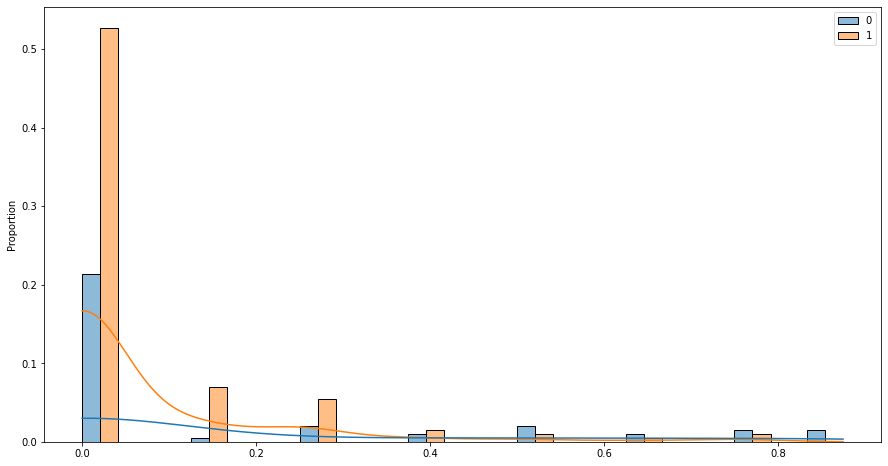

In [276]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [277]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [278]:
global_complexity

0.09328358208955224

In [279]:
class1_complexity

0.06294964028776978

In [280]:
class0_complexity

0.16129032258064516

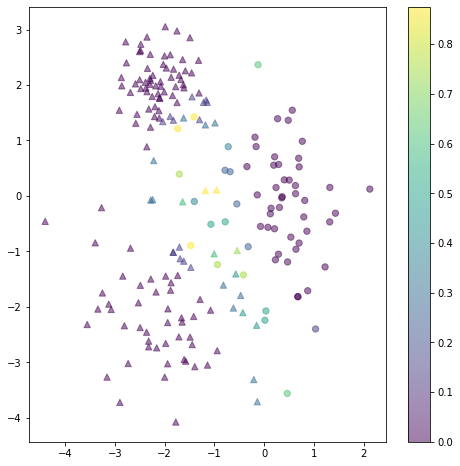

In [281]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [282]:
dynamic_kdn = DkDN(k=8)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [283]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.101144
std        0.202092
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.940000
dtype: float64

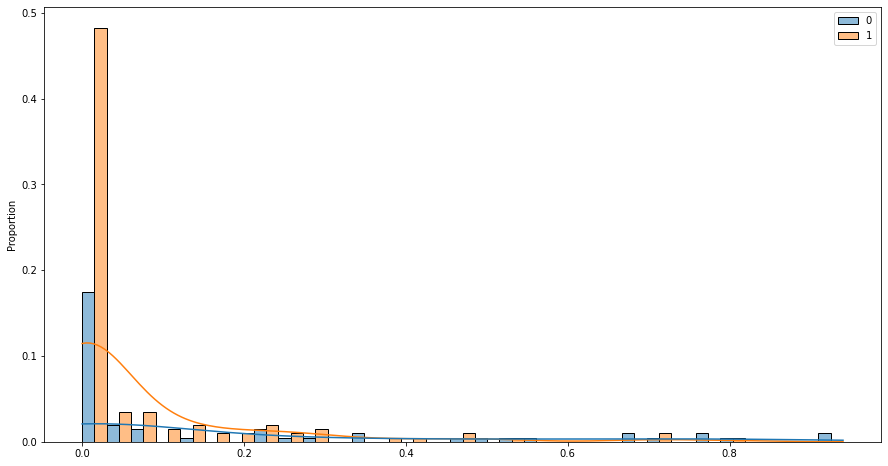

In [284]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [285]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [286]:
global_complexity_d

0.10114427860696518

In [287]:
class1_complexity_d

0.0683453237410072

In [288]:
class0_complexity_d

0.1746774193548387

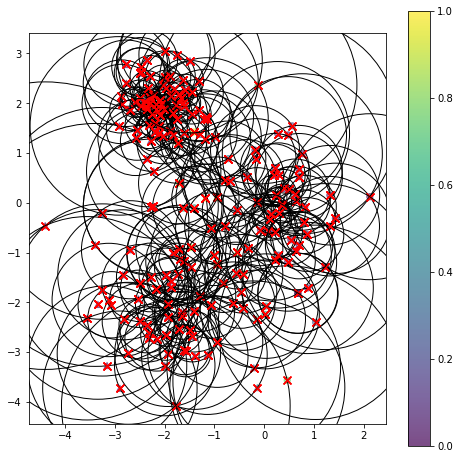

In [289]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [290]:
dynamic_kdn = DkDN(k=8)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [291]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.087960
std        0.174898
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.890000
dtype: float64

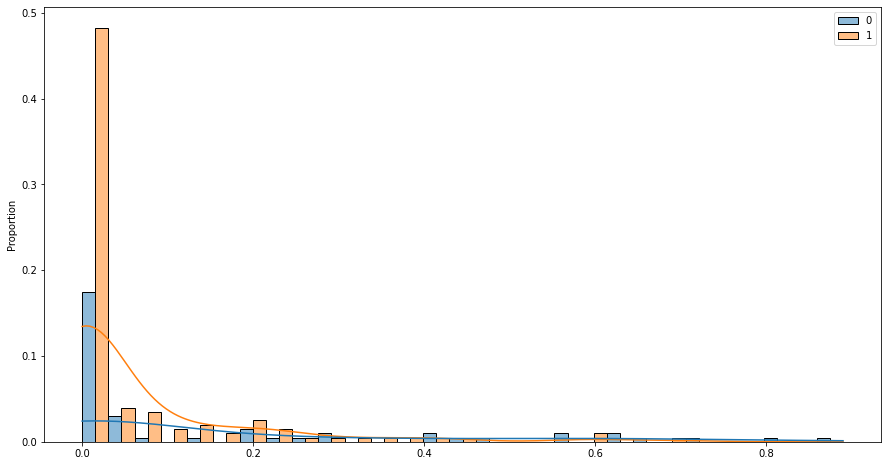

In [292]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [293]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [294]:
global_complexity_d

0.08796019900497512

In [295]:
class1_complexity_d

0.059568345323741015

In [296]:
class0_complexity_d

0.15161290322580645

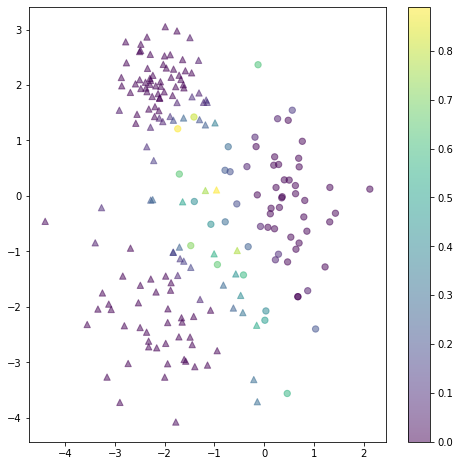

In [297]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [298]:
complexity, _ = kdn_score(X_train, y_train, 9)

In [299]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.093422
std        0.199212
min        0.000000
25%        0.000000
50%        0.000000
75%        0.111111
max        0.888889
dtype: float64

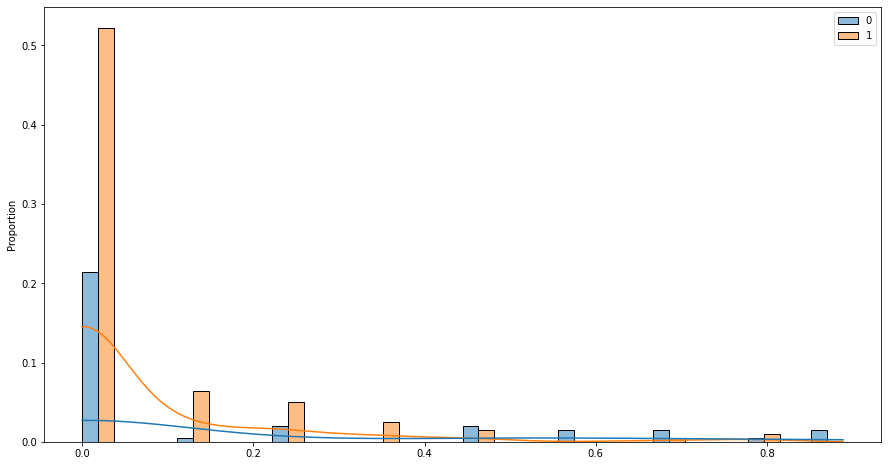

In [300]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [301]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [302]:
global_complexity

0.09342177998894417

In [303]:
class1_complexity

0.06394884092725818

In [304]:
class0_complexity

0.15949820788530467

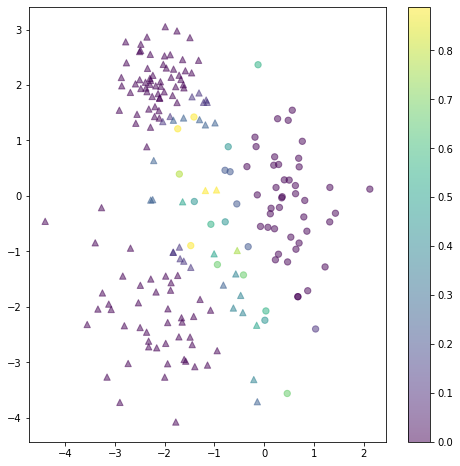

In [305]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [306]:
dynamic_kdn = DkDN(k=9)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [307]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.104080
std        0.199603
min        0.000000
25%        0.000000
50%        0.000000
75%        0.110000
max        0.940000
dtype: float64

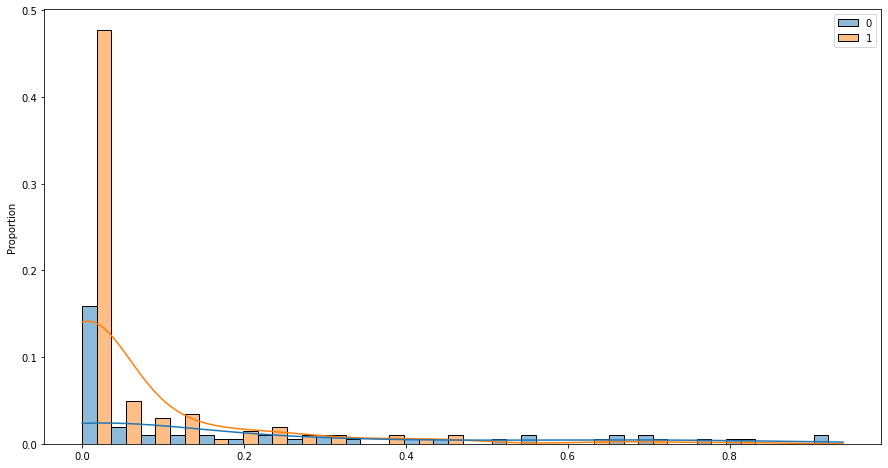

In [308]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [309]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [310]:
global_complexity_d

0.10407960199004976

In [311]:
class1_complexity_d

0.06705035971223022

In [312]:
class0_complexity_d

0.18709677419354837

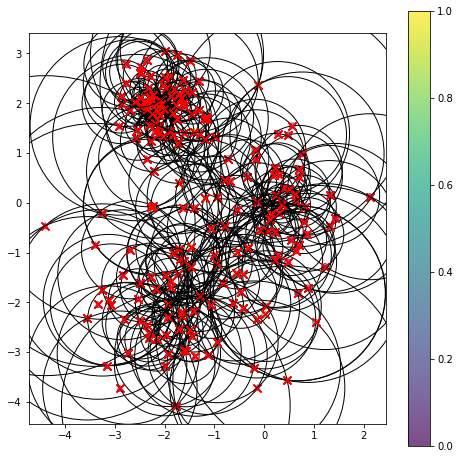

In [313]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [314]:
dynamic_kdn = DkDN(k=9)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [315]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.092090
std        0.175595
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.890000
dtype: float64

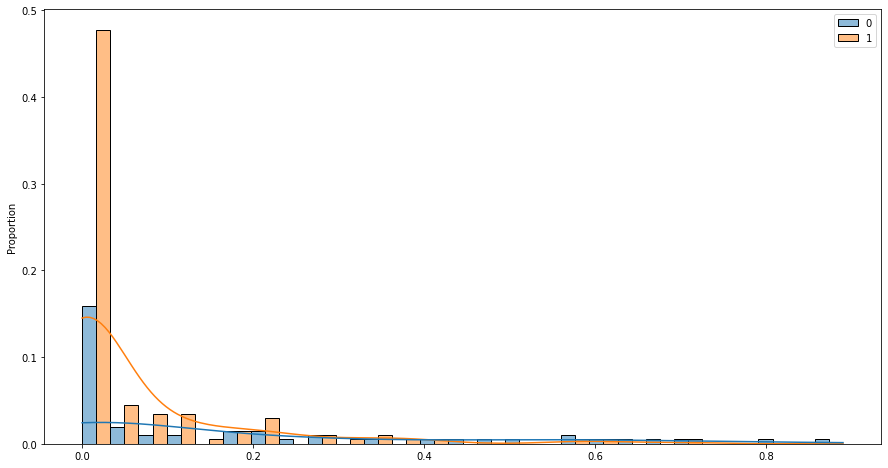

In [316]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [317]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [318]:
global_complexity_d

0.09208955223880598

In [319]:
class1_complexity_d

0.059568345323741015

In [320]:
class0_complexity_d

0.16499999999999998

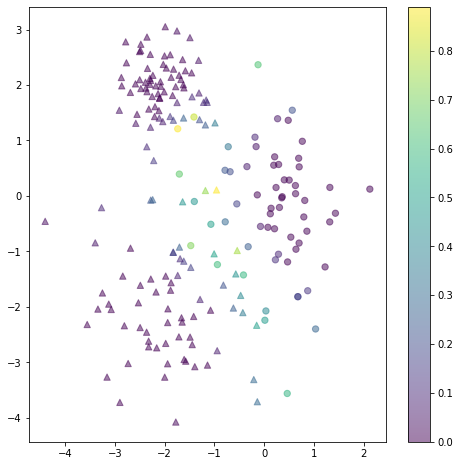

In [321]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [322]:
complexity, _ = kdn_score(X_train, y_train, 10)

In [323]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.092040
std        0.195797
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.900000
dtype: float64

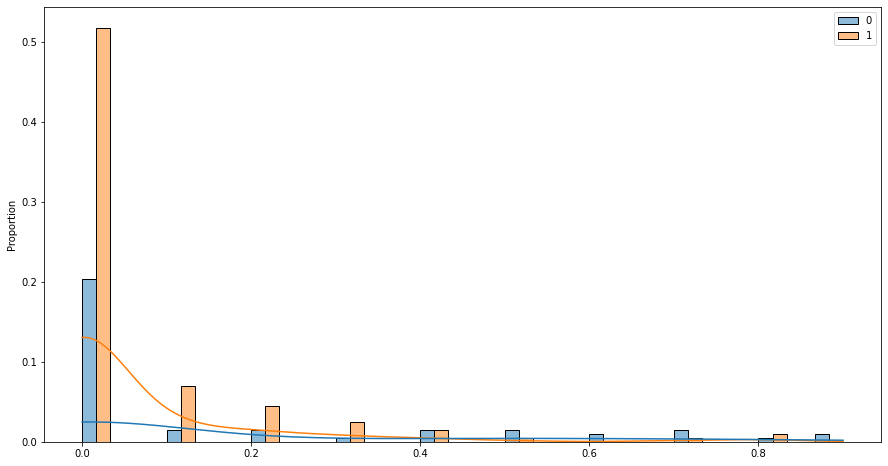

In [324]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [325]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [326]:
global_complexity

0.09203980099502487

In [327]:
class1_complexity

0.06258992805755395

In [328]:
class0_complexity

0.15806451612903227

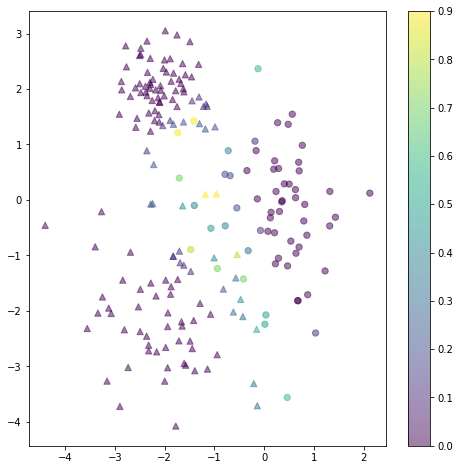

In [329]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [330]:
dynamic_kdn = DkDN(k=10)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [331]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.104726
std        0.198864
min        0.000000
25%        0.000000
50%        0.000000
75%        0.120000
max        0.940000
dtype: float64

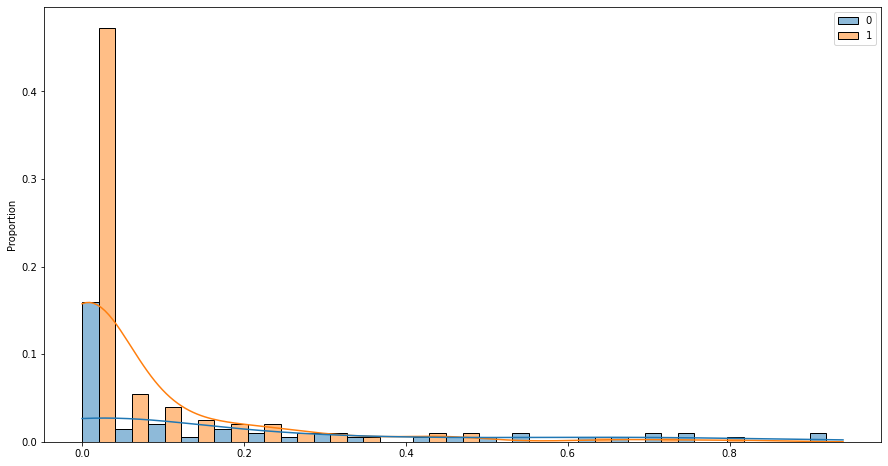

In [332]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [333]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [334]:
global_complexity_d

0.10472636815920398

In [335]:
class1_complexity_d

0.06741007194244605

In [336]:
class0_complexity_d

0.18838709677419355

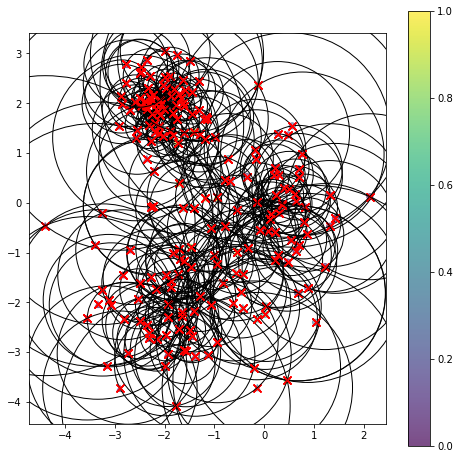

In [337]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [338]:
dynamic_kdn = DkDN(k=10)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [339]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.093284
std        0.176420
min        0.000000
25%        0.000000
50%        0.000000
75%        0.110000
max        0.890000
dtype: float64

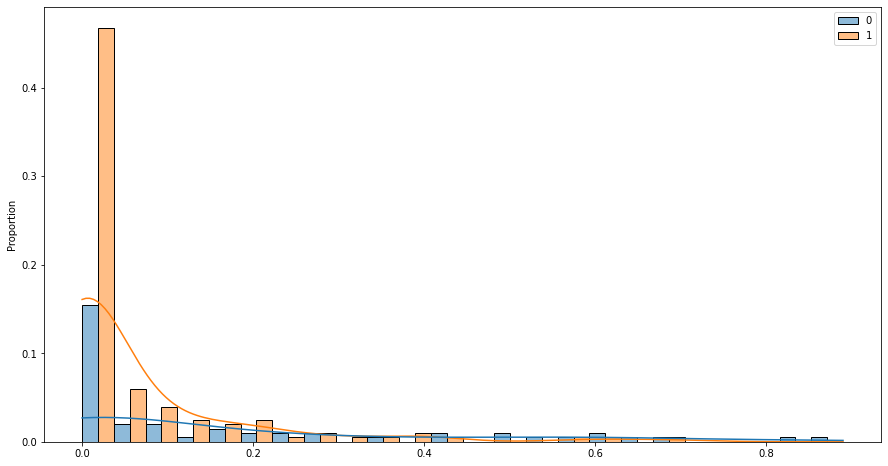

In [340]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [341]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [342]:
global_complexity_d

0.09328358208955224

In [343]:
class1_complexity_d

0.06028776978417267

In [344]:
class0_complexity_d

0.16725806451612904

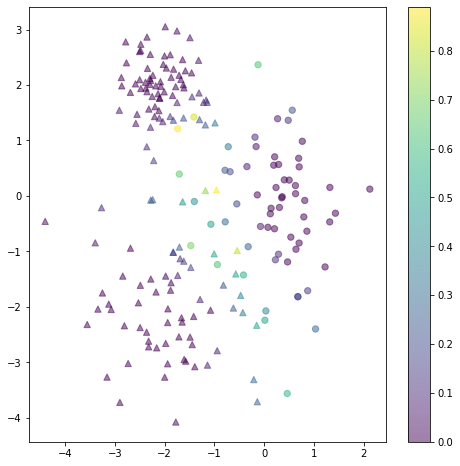

In [345]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### KDN

In [346]:
complexity, _ = kdn_score(X_train, y_train, 11)

In [347]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.093623
std        0.198113
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090909
max        0.909091
dtype: float64

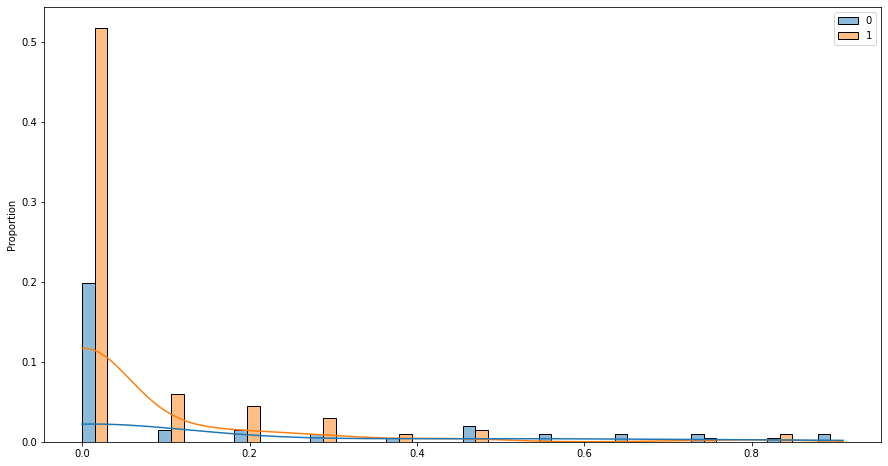

In [348]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [349]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [350]:
global_complexity

0.09362279511533243

In [351]:
class1_complexity

0.06344015696533682

In [352]:
class0_complexity

0.16129032258064518

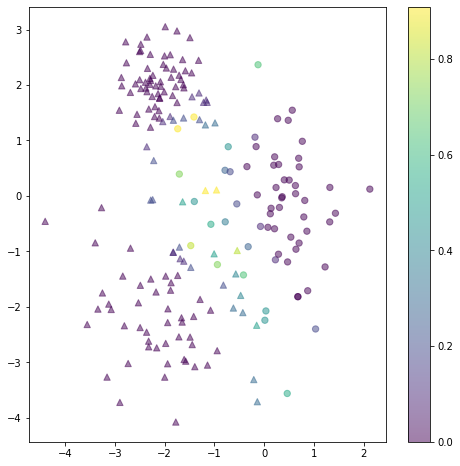

In [353]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

#### Dynamic KDN

In [354]:
dynamic_kdn = DkDN(k=11)
dynamic_kdn.fit(X_train, y_train)
complexity_d = dynamic_kdn.complexity

In [355]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.106368
std        0.198268
min        0.000000
25%        0.000000
50%        0.000000
75%        0.120000
max        0.940000
dtype: float64

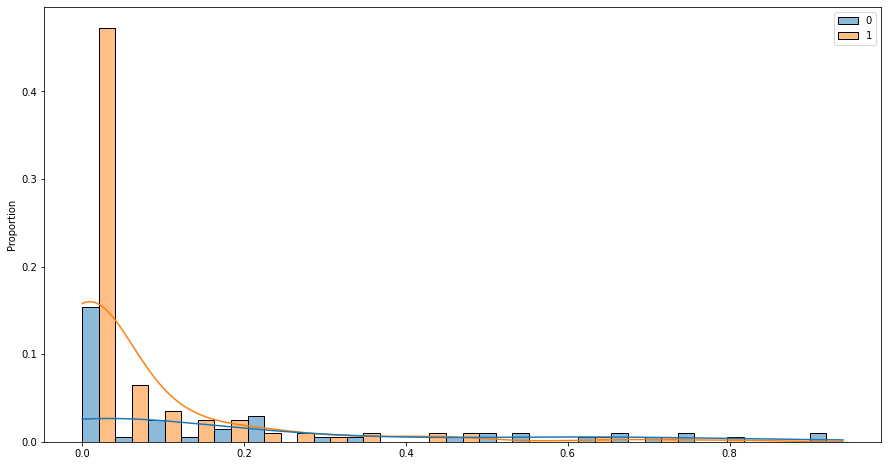

In [356]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [357]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [358]:
global_complexity_d

0.1063681592039801

In [359]:
class1_complexity_d

0.06733812949640289

In [360]:
class0_complexity_d

0.1938709677419355

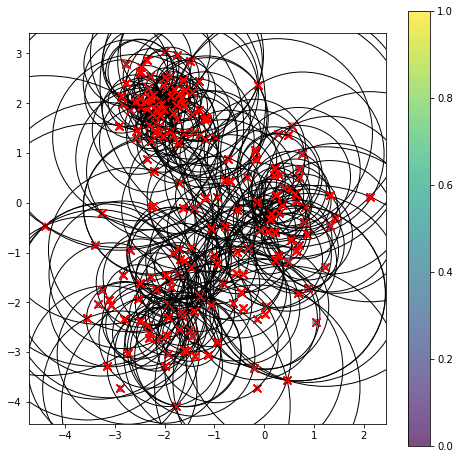

In [361]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

for i in range(len(X_train)):
    plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
    Drawing_uncolored_circle = plt.Circle( X_train[i],
                                          dynamic_kdn.radius[i],
                                          fill = False )

    axes.add_artist( Drawing_uncolored_circle )

axes.set_aspect( 1 )
plt.colorbar()

plt.show()

#### Dynamic KDN

In [362]:
dynamic_kdn = DkDN(k=11)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [363]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.095672
std        0.177721
min        0.000000
25%        0.000000
50%        0.000000
75%        0.110000
max        0.890000
dtype: float64

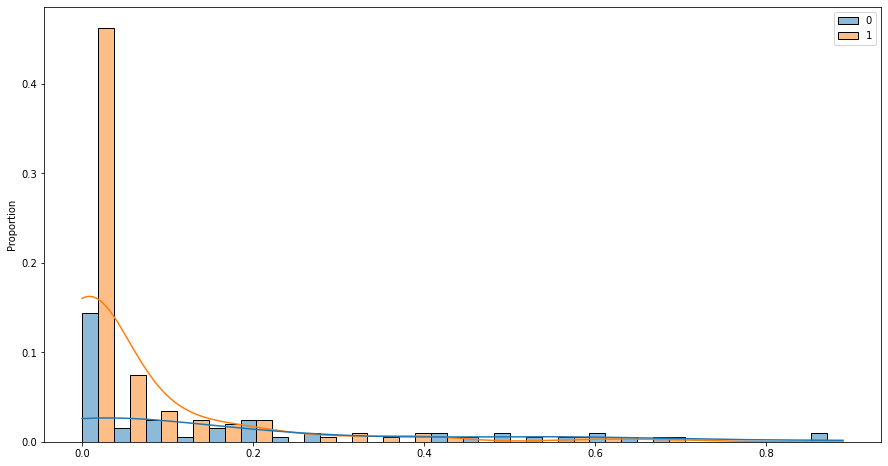

In [364]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [365]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [366]:
global_complexity_d

0.09567164179104477

In [367]:
class1_complexity_d

0.06050359712230216

In [368]:
class0_complexity_d

0.17451612903225808

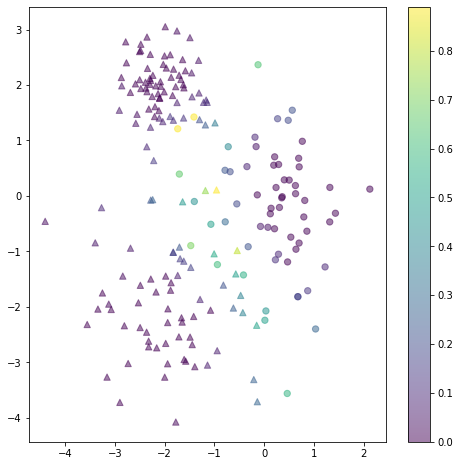

In [369]:
figure, axes = plt.subplots(figsize=[8, 8])

area1 = np.ma.masked_where(y_train < 1, y_train) + 39
area2 = np.ma.masked_where(y_train > 0 , y_train) + 40

plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X_train[:,0],X_train[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in [97]:
#     plt.scatter(X_train[dynamic_kdn.neighbours[i]][:, 0], X_train[dynamic_kdn.neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()